In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# rates
N = 6.4
q = 0.16
Lambdah = 0.25
Lambda = 1.1
beta = 4
alpha = 0.019
phi = 6.1

## Updated model, with estimated outbreak probabilities and expression for R

In [3]:
from scipy.optimize import fsolve

def system(vars, *args):
    g = args[0]
    h = args[1]
    qc, qh = vars
    
    RCC = (1-h)*((1-g)*phi+Lambda)
    RCH = h*((1-g)*phi+Lambda)
    RHC = Lambdah*(1-h)
    RHH = h*Lambdah+Lambda*beta*alpha
    
    eq1 = qc-1/(1+RCC*(1-qc)+RCH*(1-qh))
    eq2 = qh-1/(1+RHC*(1-qc)+RHH*(1-qh))
    return [eq1, eq2]

<a list of 3 text.Text objects>

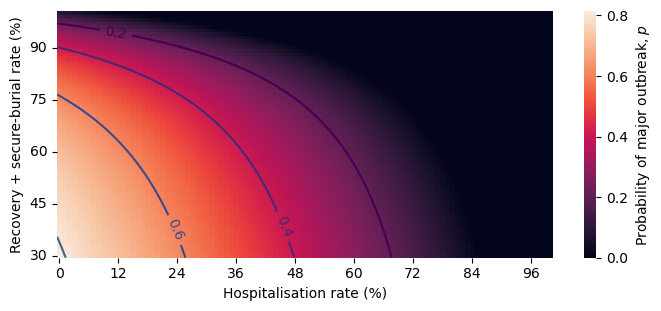

In [4]:
import pandas as pd

probabilities = [[0 for x in range(101)] for y in range(101)] # stores probabilities for the heatmap

# solve for probability of major outbreak for each value of g and h

for n in range(101):
    for m in range(30,101):
        G1 = m
        H1 = n
        qC, qH = fsolve(system, [0,0], args = (G1/100, H1/100))
        P = (H1/100)*(1-qH)+(1-H1/100)*(1-qC)
        probabilities[m][n] = P # updates with the weighted average probability of major outbreak

probs_1 = pd.DataFrame(probabilities)
probs = probs_1.reindex([30+x for x in range(71)]) # restrict attention to g >= 30%

fig, ax = plt.subplots(figsize=(8,3.2))
sns.heatmap(probs, cmap = 'rocket', cbar_kws={'label': 'Probability of major outbreak, $p$'})
ax.invert_yaxis()
plt.xlabel('Hospitalisation rate (%)')
plt.ylabel('Recovery + secure-burial rate (%)')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.locator_params(axis='y', nbins=5) # specify the number of ticks on each axis
plt.locator_params(axis='x', nbins=10)

CS = plt.contour(probs, [0.2+0.2*x for x in range(10)])
ax.clabel(CS, inline=True)

In [5]:
from numpy.linalg import eig

# function to return dominant eigenvalue

def get_R_value(g,h):
    
    matrix = np.array([[(1-h)*((1-g)*phi+Lambda), Lambdah*(1-h)], [h*((1-g)*phi+Lambda), h*Lambdah+Lambda*beta*alpha]])
    
    eigenvalues, eigenvectors = eig(matrix)
    
    dom_eig = max(eigenvalues)
    
    return dom_eig

<a list of 5 text.Text objects>

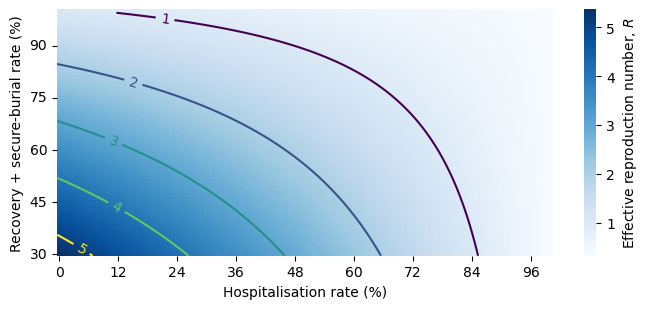

In [6]:
# plot R value

r_values = [[0 for x in range(101)] for y in range(101)] # stores R values to plot

for n in range(101):
    for m in range(30,101):
        G1 = m
        H1 = n
        r = get_R_value(G1/100, H1/100)
        r_values[m][n] = r # updates value or R appropriately

r_vals_1 = pd.DataFrame(r_values)
r_vals = r_vals_1.reindex([30+x for x in range(71)]) # restrict attention to g >= 30%

fig, ax = plt.subplots(figsize=(8,3.2))
sns.heatmap(r_vals, cmap = 'Blues', cbar_kws={'label': 'Effective reproduction number, $R$'})
ax.invert_yaxis()
plt.xlabel('Hospitalisation rate (%)')
plt.ylabel('Recovery + secure-burial rate (%)')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=10)

CS = plt.contour(r_vals, [1,2,3,4,5]) # plots contours for integer values of R
ax.clabel(CS, inline=True)

<a list of 4 text.Text objects>

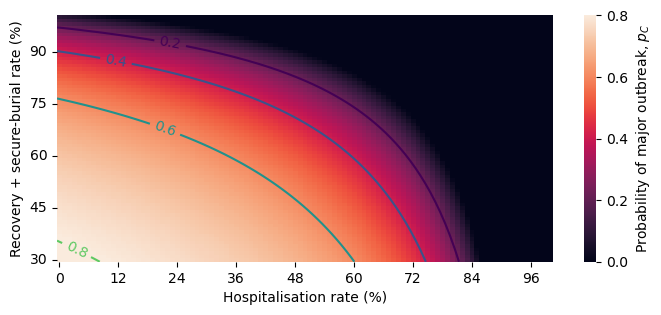

In [9]:
# plot of p_C

pc_probabilities = [[0 for x in range(101)] for y in range(101)]

# solve for probability of major outbreak for each value of g and h

for n in range(101):
    for m in range(30,101):
        G1 = m
        H1 = n
        qC, qH = fsolve(system, [0,0], args = (G1/100, H1/100))
        pc_probabilities[m][n] = 1-qC

pc_probs_1 = pd.DataFrame(pc_probabilities)
pc_probs = pc_probs_1.reindex([30+x for x in range(71)])

fig, ax = plt.subplots(figsize=(8,3.2))
sns.heatmap(qc_probs, cbar_kws={'label': 'Probability of major outbreak, $p_C$'}, vmax=0.8) # vmax fixes scale for each heatmap
ax.invert_yaxis()
plt.xlabel('Hospitalisation rate (%)')
plt.ylabel('Recovery + secure-burial rate (%)')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=10)

CS = plt.contour(qc_probs, [0.2+0.2*x for x in range(5)])
ax.clabel(CS, inline=True)


<a list of 1 text.Text objects>

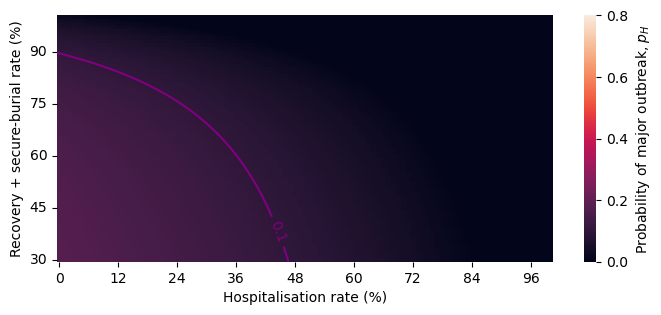

In [10]:
# plot of p_H

ph_probabilities = [[0 for x in range(101)] for y in range(101)]

# solve for probability of major outbreak for each value of g and h

for n in range(101):
    for m in range(30,101):
        G1 = m
        H1 = n
        qC, qH = fsolve(system, [0,0], args = (G1/100, H1/100))
        ph_probabilities[m][n] = 1-qH

ph_probs_1 = pd.DataFrame(ph_probabilities)
ph_probs = ph_probs_1.reindex([30+x for x in range(71)])

fig, ax = plt.subplots(figsize=(8,3.2))
sns.heatmap(qh_probs, cbar_kws={'label': 'Probability of major outbreak, $p_H$', 'ticks':[0.2*x for x in range(10)]}, vmax=0.8)
ax.invert_yaxis()
plt.xlabel('Hospitalisation rate (%)')
plt.ylabel('Recovery + secure-burial rate (%)')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=10)

CS = plt.contour(qh_probs, [0.1*(x+1) for x in range(11)], colors='purple')
ax.clabel(CS, inline=True)